In [ ]:
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

In [ ]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
print(gapminder.head(3))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710


In [ ]:
gapminder=gapminder[gapminder.year.isin([2002,1962])]

In [ ]:
gapminder

,country,year,pop,continent,lifeExp,gdpPercap
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
10,Afghanistan,2002,25268405.0,Asia,42.129,726.734055
14,Albania,1962,1728137.0,Europe,64.820,2312.888958
22,Albania,2002,3508512.0,Europe,75.651,4604.211737
26,Algeria,1962,11000948.0,Africa,48.303,2550.816880
...,...,...,...,...,...,...
1678,Yemen Rep.,2002,18701257.0,Asia,60.308,2234.820827
1682,Zambia,1962,3421000.0,Africa,46.023,1452.725766
1690,Zambia,2002,10595811.0,Africa,39.193,1071.613938
1694,Zimbabwe,1962,4277736.0,Africa,52.358,527.272182


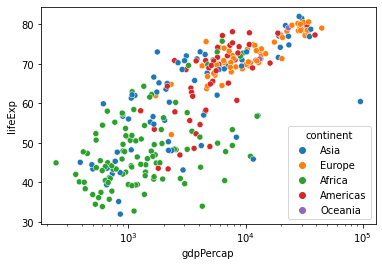

In [ ]:
g =sns.scatterplot(x="gdpPercap", y="lifeExp",
              hue="continent",
              data=gapminder);
g.set(xscale="log");

# Dự đoán Bệnh tim bằng Máy học

Sổ tay này sẽ giới thiệu một số khái niệm nền tảng về máy học và khoa học dữ liệu bằng cách khám phá vấn đề bệnh tim **classification**.

Nó được thiết kế để trở thành một ví dụ cuối cùng về khoa học dữ liệu và học máy **proof of concept** có thể trông như thế nào.

## Phân loại là gì?

Phân loại liên quan đến việc quyết định xem một mẫu là một phần của lớp này hay lớp khác (**single-class classification**). Nếu có nhiều tùy chọn lớp, nó được gọi là **multi-class classification**.


## Kết cục của chúng ta là gì


Cụ thể hơn, chúng ta sẽ xem xét các chủ đề sau.

* **Exploratory data analysis (EDA)** - quá trình xem qua một tập dữ liệu và tìm hiểu thêm về nó.
* **Model training** - tạo (các) mô hình để học cách dự đoán một biến mục tiêu dựa trên các biến khác.
* **Model evaluation** - đánh giá dự đoán mô hình bằng cách sử dụng các số liệu đánh giá cụ thể về vấn đề.
* **Model comparison** - so sánh một số mô hình khác nhau để tìm ra mô hình tốt nhất.
* **Model fine-tuning** - khi chúng tôi đã tìm thấy một mô hình tốt, chúng tôi có thể cải thiện mô hình đó bằng cách nào?
* **Feature importance** - vì chúng tôi đang dự đoán sự hiện diện của bệnh tim, có một số điều quan trọng hơn để dự đoán không?
* **Cross-validation** - nếu chúng ta xây dựng một mô hình tốt, chúng ta có thể chắc chắn rằng nó sẽ hoạt động trên dữ liệu không nhìn thấy được không?
* **Reporting what we've found** - nếu chúng tôi phải trình bày công việc của mình, chúng tôi sẽ cho ai đó xem những gì?

## 1. Định nghĩa Vấn đề
Trong một tuyên bố,
> Với các thông số lâm sàng về một bệnh nhân, chúng ta có thể dự đoán họ có bị bệnh tim hay không

## 2. Dữ liệu
* Dữ liệu ban đầu đến từ dữ liệu Cleavland từ Kho lưu trữ Học máy UCI. https://archive.ics.uci.edu/ml/datasets/heart+Disease

* Cũng có một phiên bản của nó trên Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Đánh giá

> Nếu chúng tôi có thể đạt độ chính xác 95% trong việc dự đoán liệu một bệnh nhân có bị bệnh tim hay không trong quá trình chứng minh khái niệm, chúng tôi sẽ theo đuổi dự án.

## 4. Tính năng

- Các tính năng là các phần khác nhau của dữ liệu. Trong bước này, bạn sẽ muốn bắt đầu tìm hiểu những gì bạn có thể về dữ liệu.

- Một trong những cách phổ biến nhất để làm điều này là tạo ** từ điển dữ liệu **

** Tạo từ điển dữ liệu **

1. tuổi - tuổi tính bằng năm
2. giới tính - (1 = nam; 0 = nữ)
3. cp - kiểu đau ngực
    * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
    * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
    * 2: Đau không do đau thắt ngực: thường là co thắt thực quản (không liên quan đến tim)
    * 3: Không triệu chứng: đau ngực không biểu hiện bệnh
4. trestbps - huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện) bất kỳ điều gì trên 130-140 thường là nguyên nhân đáng lo ngại
5. chol - cholestoral trong huyết thanh tính bằng mg / dl
    * huyết thanh = LDL + HDL + .2 * chất béo trung tính
    * trên 200 là lý do để lo ngại
6. fbs - (đường huyết lúc đói> 120 mg / dl) (1 = true; 0 = false)
    * '> 126' mg / dL báo hiệu bệnh tiểu đường
7. restecg - kết quả điện tâm đồ lúc nghỉ
    * 0: Không có gì cần lưu ý
    * 1: Bất thường về sóng ST-T
        * có thể từ các triệu chứng nhẹ đến các vấn đề nghiêm trọng
        * báo hiệu nhịp tim không bình thường
    * 2: Phì đại thất trái có thể hoặc xác định
        * Mở rộng buồng bơm chính của tim
8. thalach - nhịp tim tối đa đạt được
9. exang - đau thắt ngực do tập thể dục (1 = có; 0 = không)
10. oldpeak - ST trầm cảm gây ra do tập thể dục liên quan đến nghỉ ngơi nhìn căng thẳng của tim khi tập thể dục, tim không khỏe mạnh sẽ căng thẳng hơn
11. slope  - độ dốc của đoạn ST tập luyện đỉnh cao
    * 0: Upsloping: nhịp tim tốt hơn khi tập thể dục (không phổ biến)
    * 1: Flatsloping: thay đổi tối thiểu (tim khỏe mạnh điển hình)
    * 2: Downslopins: dấu hiệu của tim không khỏe
12. ca - số lượng các mạch chính (0-3) được tô màu bởi bột màu
    * mạch màu có nghĩa là bác sĩ có thể nhìn thấy máu đi qua
    * máu di chuyển càng nhiều càng tốt (không có cục máu đông)
13. thal - kết quả ứng suất thalium
    * 1,3: bình thường
    * 6: sửa lỗi: đã từng là lỗi nhưng bây giờ ok
    * 7: khiếm khuyết có thể đảo ngược: không có chuyển động máu thích hợp khi tập thể dục
14. target - có bệnh hay không (1 = có, 0 = không) (= thuộc tính dự đoán)

## Preparing the tools

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [ ]:
# Regular EDA (Exploretory Data Analysis) and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models from Scikit-Learn: Search "scikit learn model map"
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score #Classification Problem
from sklearn.metrics import plot_roc_curve

In [ ]:
df = pd.read_csv('./data/heart.csv')

In [ ]:
df.shape # (rows, columns)

(303, 14)

## EDA (Exploratory Data Analysis)

Mục tiêu: tìm hiểu thêm về dữ liệu và trở thành chuyên gia về chủ đề trên tập dữ liệu mà bạn đang làm việc.

#### Danh mục
1. Bạn đang cố giải (hoặc chứng minh là sai) câu hỏi nào?
2. Bạn có loại dữ liệu nào và bạn xử lý các loại khác nhau như thế nào?
3. Dữ liệu còn thiếu điều gì và bạn xử lý như thế nào?
4. Đâu là những ngoại lệ và tại sao bạn nên quan tâm đến chúng?
5. Làm cách nào bạn có thể thêm, thay đổi hoặc loại bỏ các tính năng để khai thác nhiều hơn dữ liệu của mình?

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Let's find out how many of each class ther
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

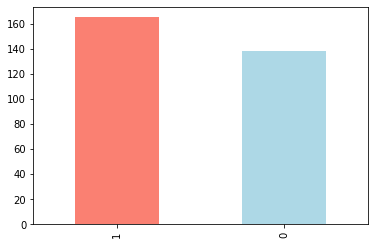

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

> This is **Balance** Classification Problem as (#0 & #1 are quite similar)

### Check Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


`description ()` hiển thị một loạt các chỉ số khác nhau về các cột số của bạn, chẳng hạn như trung bình, tối đa và độ lệch chuẩn.
### Tần suất bệnh tim theo giới tính

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


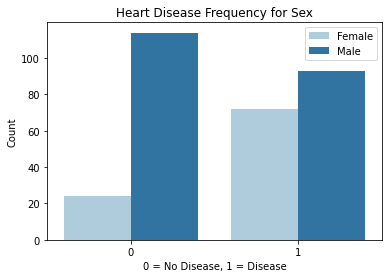

In [ ]:
sns.countplot(data=df, x="target", hue="sex", palette="Paired")
# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Tuổi so với Nhịp tim tối đa đối với Bệnh tim

- kết hợp một số biến độc lập, chẳng hạn như `tuổi` và` thalach` (nhịp tim tối đa) và sau đó so sánh chúng với biến mục tiêu của chúng tôi là `bệnh tim`.

Vì có rất nhiều giá trị khác nhau cho `age` và` thalach`, chúng tôi sẽ sử dụng biểu đồ phân tán.

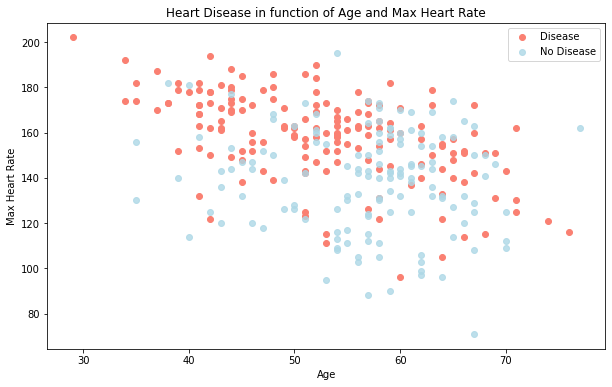

In [ ]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue", alpha=0.8);

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Chúng ta có thể suy ra điều gì từ điều này?

- ai đó càng trẻ, nhịp tim tối đa của họ càng cao

Tất nhiên, cả hai điều này đều là quan sát, nhưng đây là những gì chúng tôi đang cố gắng làm, xây dựng sự hiểu biết về dữ liệu.

Hãy kiểm tra độ tuổi **phân phối**.

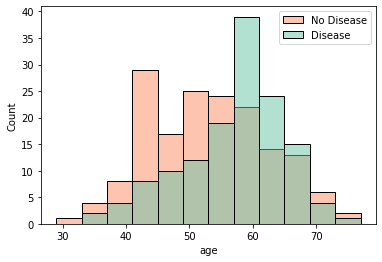

In [ ]:
sns.histplot(data=df, x="age", hue="target", palette='Set2')

plt.legend(["No Disease", "Disease"]);

### Tần suất bệnh tim trên mỗi loại đau ngực

3. cp - kiểu đau ngực
     * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
     * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
     * 2: Đau không do đau thắt ngực: thường là co thắt thực quản (không liên quan đến tim)
     * 3: Không triệu chứng: đau ngực không biểu hiện bệnh

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


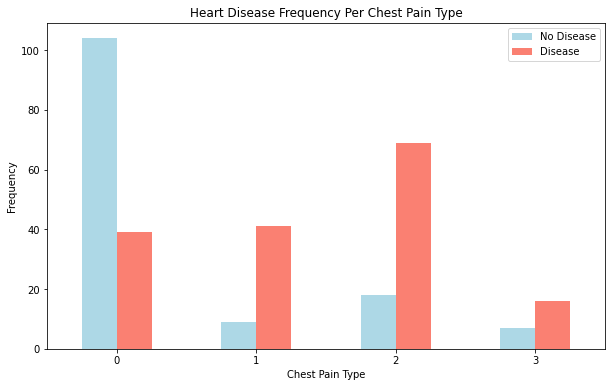

In [ ]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

Thật thú vị khi chứng đau thắt ngực không điển hình (giá trị 1) nói rằng nó không liên quan đến tim nhưng dường như có tỷ lệ người tham gia bị bệnh tim cao hơn không.

Agina không điển hình thậm chí có nghĩa là gì?

Tại thời điểm này, điều quan trọng cần nhớ là, nếu từ điển dữ liệu của bạn không cung cấp đủ thông tin cho bạn, bạn có thể muốn nghiên cứu thêm về các giá trị của mình. Nghiên cứu này có thể dưới hình thức hỏi một ** chuyên gia về chủ đề ** (chẳng hạn như bác sĩ tim mạch hoặc người đã cung cấp cho bạn dữ liệu) hoặc Google để tìm hiểu thêm.

Theo PubMed, có vẻ như [ngay cả một số chuyên gia y tế cũng bị nhầm lẫn bởi thuật ngữ này] (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/).

> Ngày nay, 23 năm sau, “đau ngực không điển hình” vẫn còn phổ biến trong giới y khoa. Tuy nhiên, ý nghĩa của nó vẫn chưa rõ ràng. Một số bài báo có thuật ngữ trong tiêu đề của họ, nhưng không định nghĩa hoặc thảo luận về nó trong văn bản của họ. Trong các bài báo khác, thuật ngữ này đề cập đến các nguyên nhân không do tim gây ra đau ngực.

Mặc dù không phải là kết luận, nhưng biểu đồ trên là một gợi ý về sự nhầm lẫn của độ lệch được biểu diễn trong dữ liệu.


### Tương quan giữa các biến độc lập

- so sánh tất cả các biến độc lập trong một lần truy cập.

Tại sao?

- Bởi vì điều này có thể đưa ra ý tưởng về những biến độc lập nào có thể có hoặc có thể không có tác động đến biến mục tiêu của chúng ta.

Chúng tôi có thể thực hiện việc này bằng cách sử dụng `df.corr ()` sẽ tạo ra [** ma trận tương quan **] (https://www.st Statisticshowto.datasciencecentral.com/correlation-matrix/) cho chúng tôi, nói cách khác, a bảng số lớn cho chúng ta biết mức độ liên quan của mỗi biến với nhau.

In [ ]:
# Make a correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


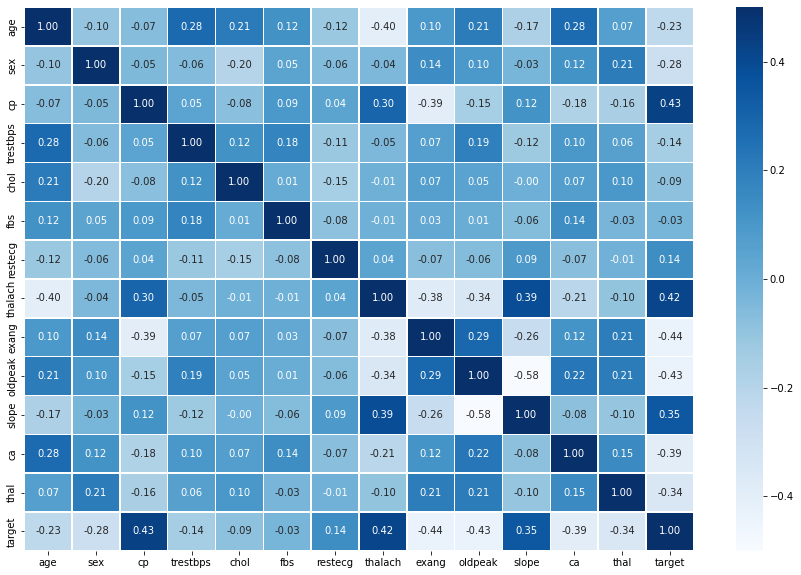

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))


ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap = "Blues",
                vmin=-0.5,vmax=0.5);

#### Quan sát
- `(cp, target) = 0,43` => Tương quan vị trí: Khi Cp tăng lên, target cũng tăng
- `(exang, target) = -0,44 '=> Tương quan tiêu cực: Thật kỳ lạ, nếu ai đó bị đau ngực khi tập thể dục (exang = 1), khả năng mắc bệnh tim của họ sẽ giảm xuống (target = 0)
    - exang là "tập thể dục gây đau ngực"
    
Vì vậy, những gì chúng tôi sẽ làm tiếp theo là **EDA điều khiển theo mô hình**, nghĩa là, chúng tôi sẽ sử dụng các mô hình học máy để thúc đẩy các câu hỏi tiếp theo của chúng tôi.

    * Phân phối (`df.column.hist ()`)
    * Thiếu giá trị (`df.info ()`)
    * Ngoại lệ



## 5. Mô hình đào tạo máy học
Hãy xây dựng một số mô hình học máy:
1. Hồi quy hậu cần - [`LogisticRegression ()`] (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier ()`] (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier ()`] (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# Split data into X and y

X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
# Split data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=10000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creat a funciton to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop throuhg models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(X_test, y_test)
    return model_scores


In [ ]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_score

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [ ]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


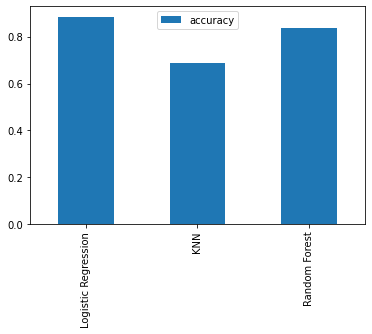

In [ ]:
model_compare.T.plot.bar();

Bây giờ chúng tôi đã có một mô hình cơ sở ... và chúng tôi biết những dự đoán đầu tiên của một mô hình không phải lúc nào cũng là những gì chúng tôi nên dựa trên các bước tiếp theo của mình. Chúng ta nên làm gì?
Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [ ]:
# Let's tune KNN
train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through diff n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the algo
    knn.fit(X_train, y_train)

    #Update training score list
    train_scores.append(knn.score(X_train, y_train))
    #Update test score list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


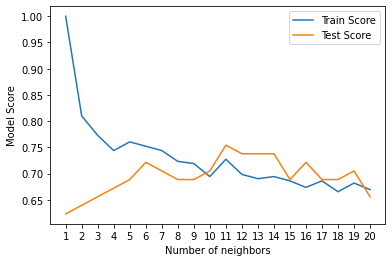

In [ ]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune below models using `RandomizedSearchCV`
* LogisticRegression()
* RandomForestClassifier()


In [ ]:
# Create a hyper-parameter grid for LogisticRegression()

log_reg_grid = {"C": np.logspace(-4,4,20), #most valuable for Log Reg model
                "solver": ["liblinear"]}

# Create a hyper-parameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models, let's tune them using `RandomizedSearchCV`

In [ ]:
# Tune Logistic Regression

np.random.seed(42)

#Setup random hyper-parameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, #Try diff combo of the hyper-grid
                                verbose=True)
#Fit ranerror_score=dom hyper-parameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned `LogisticRegression()`, let's do the same for `RandomForestClassifier()`...

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [ ]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Đánh giá một mô hình phân loại, ngoài độ chính xác

Bây giờ chúng ta đã có một mô hình được điều chỉnh, hãy xem một số chỉ số mà chúng ta đã thảo luận trước đây.
We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

May mắn thay, Scikit-Learn có tất cả những thứ này được tích hợp sẵn.

Để truy cập chúng, chúng tôi sẽ phải sử dụng mô hình của mình để đưa ra dự đoán trên tập thử nghiệm. Bạn có thể đưa ra các dự đoán bằng cách gọi 'dự đoán ()' trên một mô hình được đào tạo và chuyển cho nó dữ liệu bạn muốn dự đoán.

Chúng tôi sẽ đưa ra dự đoán về data.ions thử nghiệm.

In [ ]:
# Make Prediabsctions with Tuned Model
y_preds = gs_log_reg.predict(X_test)


Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

Đường cong ROC là gì?

Đó là một cách để hiểu mô hình của bạn đang hoạt động như thế nào bằng cách so sánh tỷ lệ dương tính thực sự với tỷ lệ dương tính giả.

Trong trường hợp của chúng ta...

> Để lấy một ví dụ thích hợp trong một vấn đề trong thế giới thực, hãy xem xét một xét nghiệm chẩn đoán nhằm xác định xem một người có mắc một bệnh nào đó hay không. Dương tính giả trong trường hợp này xảy ra khi người đó có kết quả xét nghiệm dương tính, nhưng không thực sự mắc bệnh. Mặt khác, âm tính giả xảy ra khi người đó có kết quả xét nghiệm âm tính, cho thấy họ khỏe mạnh, trong khi họ thực sự mắc bệnh.

Scikit-Learn triển khai một hàm `plot_roc_curve` có thể giúp chúng tôi tạo đường cong ROC cũng như tính diện tích dưới chỉ số đường cong (AUC).

Đọc tài liệu về hàm [`plot_roc_curve`] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html), chúng ta có thể thấy nó sử dụng` (ước lượng, X, y) ' làm đầu vào. Trong đó `estiamator` là một mô hình học máy phù hợp và` X` và `y` là dữ liệu bạn muốn kiểm tra.

Trong trường hợp của chúng tôi, chúng tôi sẽ sử dụng phiên bản GridSearchCV của công cụ ước tính `LogisticRegression` của chúng tôi,` gs_log_reg` cũng như dữ liệu thử nghiệm, `X_test` và` y_test`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


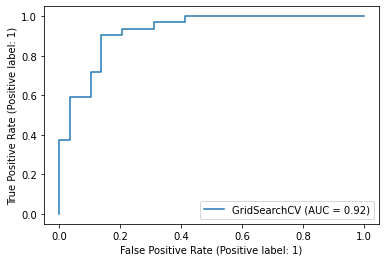

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

Điều này thật tuyệt, mô hình của chúng tôi làm tốt hơn nhiều so với việc đoán đó sẽ là một đường đi từ góc dưới bên trái đến góc trên cùng bên phải, AUC = 0,5. Nhưng một mô hình hoàn hảo sẽ đạt được điểm AUC là 1,0, vì vậy vẫn còn chỗ để cải thiện.

Hãy chuyển sang yêu cầu đánh giá tiếp theo, một ma trận nhầm lẫn.

### Ma trận hỗn loạn

Ma trận nhầm lẫn là một cách trực quan để hiển thị nơi mô hình của bạn đưa ra dự đoán đúng và nơi nó đưa ra dự đoán sai (hay nói cách khác, bị nhầm lẫn).

Scikit-Learn cho phép chúng tôi tạo một ma trận nhầm lẫn bằng cách sử dụng [`crazy_matrix ()`] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) và chuyển cho nó các nhãn thực và các nhãn dự đoán.

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [ ]:
# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(y_test,y_preds).ravel() #To flatten the matrix
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 29 3 4 25


Như bạn có thể thấy, ma trận nhầm lẫn được tích hợp sẵn trong Scikit-Learn hơi nhạt nhẽo. Đối với một bản trình bày, bạn có thể muốn làm cho nó trở nên trực quan.

Hãy tạo một hàm sử dụng [`heatmap ()`] (https://seaborn.pydata.org/generated/seaborn.heatmap.html) của Seaborn để làm như vậy.

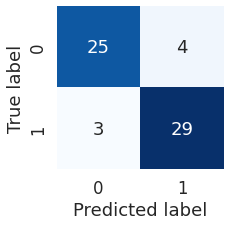

In [ ]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     cmap="Blues")
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)

Tài liệu: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
- Bạn có thể thấy mô hình bị nhầm lẫn (dự đoán sai nhãn) tương đối giống nhau trên cả hai lớp.
- 4 lần trong đó mô hình dự đoán 1 khi nó đáng lẽ bằng 0 (`dương tính giả`)
- 3 trường hợp mô hình dự đoán 0 thay vì 1 (`sai âm`).

### Báo cáo phân loại

Chúng tôi có thể tạo báo cáo phân loại bằng cách sử dụng [`phân loại_report ()`] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) và chuyển cho nó các nhãn thực cũng như các mô hình của chúng tôi các nhãn dự đoán.

Báo cáo phân loại cũng sẽ cung cấp cho chúng tôi thông tin về độ chính xác và thu hồi mô hình của chúng tôi cho từng loại.

In [ ]:
print(classification_report(y_test, y_preds)) #Based on only 1 test set

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




* **Precision** - Cho biết tỷ lệ nhận dạng tích cực (mô hình dự đoán loại 1) thực sự đúng. Mô hình không tạo ra kết quả dương tính giả có độ chính xác là 1,0.
* **Recall** - Cho biết tỷ lệ dương tính thực tế đã được phân loại chính xác. Mô hình không tạo ra âm tính giả có mức thu hồi là 1,0.
* **F1 score** - Sự kết hợp giữa độ chính xác và khả năng thu hồi. Một mô hình hoàn hảo đạt được điểm F1 là 1,0.
* **Support** - Số lượng mẫu mỗi chỉ số đã được tính toán.
* **Accuracy** - Độ chính xác của mô hình ở dạng thập phân. Độ chính xác hoàn hảo bằng 1,0.
* **Macro avg** - Viết tắt của macro trung bình, độ chính xác trung bình, thu hồi và điểm F1 giữa các lớp. Mức trung bình vĩ mô không làm mất cân bằng lớp thành nỗ lực, vì vậy nếu bạn có sự mất cân bằng lớp, hãy chú ý đến số liệu này.
* **Weighted avg** - Viết tắt của trung bình có trọng số, độ chính xác, thu hồi và điểm F1 trung bình có trọng số giữa các lớp. Có trọng số nghĩa là mỗi số liệu được tính toán theo số lượng mẫu có trong mỗi loại. Số liệu này sẽ ưu tiên cho lớp đa số (ví dụ: sẽ cho giá trị cao khi một lớp ra thực hiện một lớp khác do có nhiều mẫu hơn).

### Tính toán các chỉ số đánh giá bằng cách sử dụng xác thực chéo

Chúng tôi sẽ tính toán độ chính xác, độ chính xác, thu hồi và điểm số f1 của mô hình của chúng tôi bằng cách sử dụng xác thực chéo và để làm như vậy, chúng tôi sẽ sử dụng `cross_val_score () '.

In [ ]:
#Check best Hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [ ]:
# Visualiza cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1}, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


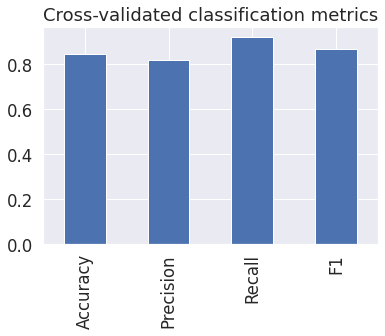

In [ ]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

## Tầm quan trọng của Tính năng

- Tầm quan trọng của tính năng là một câu hỏi khác khi hỏi "Tính năng nào đóng góp nhiều nhất vào kết quả của mô hình và chúng đã đóng góp như thế nào?"
- Việc tìm kiếm tầm quan trọng của tính năng là khác nhau đối với mỗi mô hình học máy. Một cách để tìm mức độ quan trọng của đối tượng địa lý là tìm kiếm "(Tên kiểu máy) tầm quan trọng của đối tượng địa lý"

In [ ]:
clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# Match coef;s of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

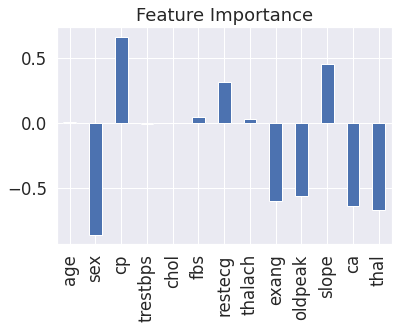

In [ ]:
# Visualiza Feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

- Giá trị càng lớn (thanh càng lớn) thì tính năng càng đóng góp nhiều vào quyết định kiểu máy.
- Nếu giá trị là âm, có nghĩa là có mối tương quan âm. Và ngược lại đối với các giá trị dương.
Ví dụ: thuộc tính `sex` có giá trị âm là -0,904, có nghĩa là khi giá trị cho` sex` tăng lên, thì giá trị `target` sẽ giảm xuống.

Chúng ta có thể thấy điều này bằng cách so sánh cột `giới tính` với cột` mục tiêu`.

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Nhìn lại từ điển dữ liệu, chúng ta thấy `độ dốc` là" độ dốc của đoạn ST bài tập đỉnh "trong đó:
* 0: Upsloping: nhịp tim tốt hơn khi tập thể dục (không phổ biến)
* 1: Flatsloping: thay đổi tối thiểu (tim khỏe mạnh điển hình)
* 2: Downslopins: dấu hiệu của tim không khỏe

In [ ]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Thử nghiệm

Nếu bạn chưa đạt được chỉ số đánh giá của mình .. hãy tự hỏi bản thân ...
* Bạn có thể thu thập thêm dữ liệu?
* Bạn có thể thử một mô hình tốt hơn? Thích CatBoost hay XGBoost?
* Bạn có thể cải thiện các mô hình hiện tại? (Ngoài những gì chúng tôi đã làm cho đến nay)
* Nếu mô hình của bạn đủ tốt (bạn đã đạt được chỉ số đánh giá của mình, bạn sẽ xuất nó và chia sẻ với những người khác như thế nào?)